

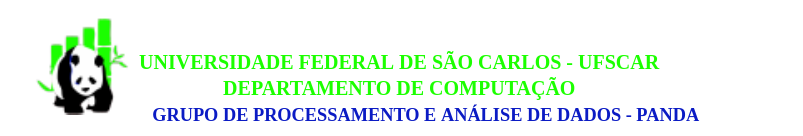


# **Prophet**

## **Introdução**

Prophet é uma biblioteca de código aberto desenvolvida pelo Facebook para análise e previsão de séries temporais. Ela foi projetada para ser uma ferramenta de previsão fácil de usar, que pode ser aplicada a uma ampla gama de problemas de previsão, incluindo vendas, demanda, tráfego na web e muito mais. O objetivo do Prophet é permitir que os analistas e cientistas de dados construam previsões precisas com menos esforço em comparação com métodos tradicionais.

## **Características**

**. Modelagem de Componentes Aditivos:** O Prophet modela as séries temporais como a soma de várias componentes, incluindo tendência, sazonalidade anual e semanal, efeitos de feriados e componentes personalizados. Isso permite que o modelo capture diferentes padrões presentes nos dados.

**. Lidando com Dados Ausentes:** O Prophet é projetado para lidar com dados ausentes e lacunas na série temporal. Ele preenche automaticamente esses dados ausentes usando um método de interpolação.

**. Modelagem de Feriados:** O Prophet permite especificar feriados que podem afetar os padrões da série temporal. Ele inclui muitos feriados padrão, mas também permite que você adicione feriados personalizados que sejam relevantes para o seu domínio.

**. Flexibilidade:** O Prophet é flexível o suficiente para trabalhar com séries temporais que têm sazonalidade complexa, tendência não linear e outros padrões não triviais.

**. Interfaces Simples:** A biblioteca é projetada para ser fácil de usar, mesmo para pessoas que não são especialistas em séries temporais. Ela oferece interfaces simples para ajustar modelos, fazer previsões e visualizar resultados.

**. Componentes Customizados:** Você pode adicionar suas próprias componentes personalizadas para capturar efeitos específicos que podem afetar a série temporal.

**. Visualização Automática:** O Prophet inclui ferramentas para visualizar automaticamente os dados de entrada, as componentes de previsão e os resultados das previsões.

**. Modelagem Multiplicativa:** Prophet pode ser usado para modelagem multiplicativa, que é útil para séries temporais onde a sazonalidade e a tendência crescem ou diminuem de maneira exponencial.

## **Instalação de bibliotecas**

In [ ]:
!pip install prophet

## **Quick Start**

In [ ]:
# Python
import pandas as pd
from prophet import Prophet


In [ ]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [ ]:
print(df.shape[0])

2905


In [ ]:
print(df.columns)

Index(['ds', 'y'], dtype='object')


Plotando o gráfico sem fazer previsões



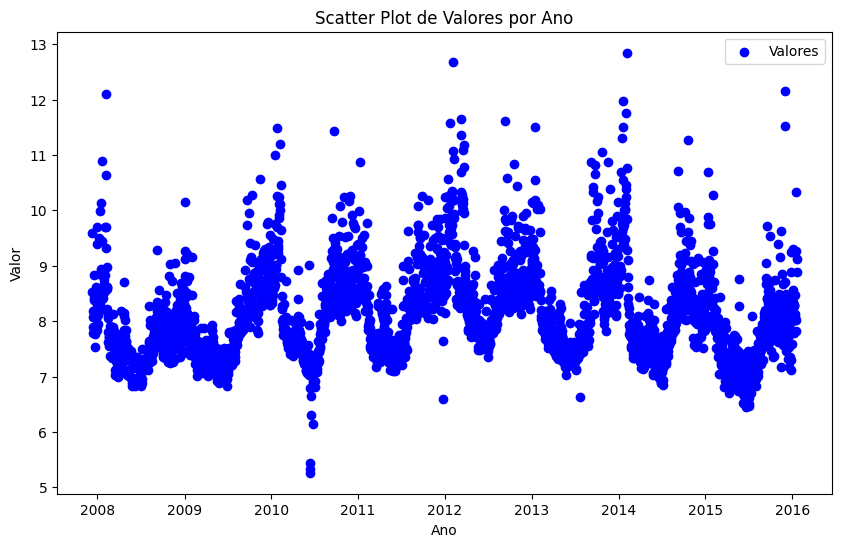

In [ ]:
import matplotlib.pyplot as plt
df_1 = df.copy()
df_1['ds'] = pd.to_datetime(df['ds'])



plt.figure(figsize=(10, 6))
plt.scatter(df_1['ds'], df_1['y'], color='blue', label='Valores')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Scatter Plot de Valores por Ano')
plt.legend()
plt.show()

In [ ]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/1mv3ock7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/m_6nubjq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53055', 'data', 'file=/tmp/tmpxcvx8swo/1mv3ock7.json', 'init=/tmp/tmpxcvx8swo/m_6nubjq.json', 'output', 'file=/tmp/tmpxcvx8swo/prophet_modelbuy3f0o5/prophet_model-20230830091029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:10:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:10:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.208305,7.485311,8.938615
3266,2017-01-16,8.533309,7.789536,9.241550
3267,2017-01-17,8.320714,7.626474,9.050707
3268,2017-01-18,8.153356,7.419687,8.828255
3269,2017-01-19,8.165279,7.443711,8.890214


Plotando as previsões

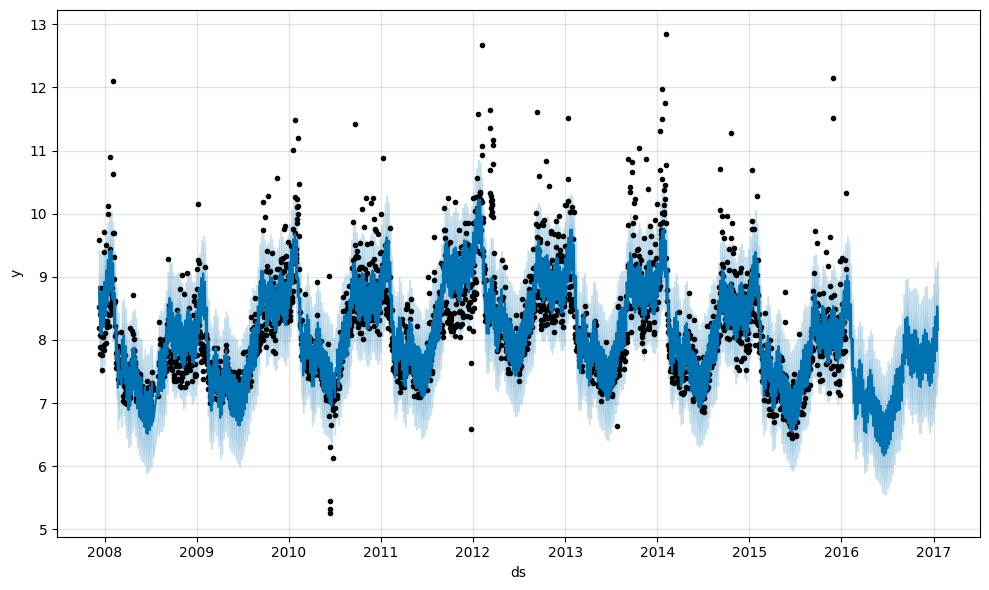

In [ ]:
fig1 = m.plot(forecast)


Plotando a decomposição separadamente

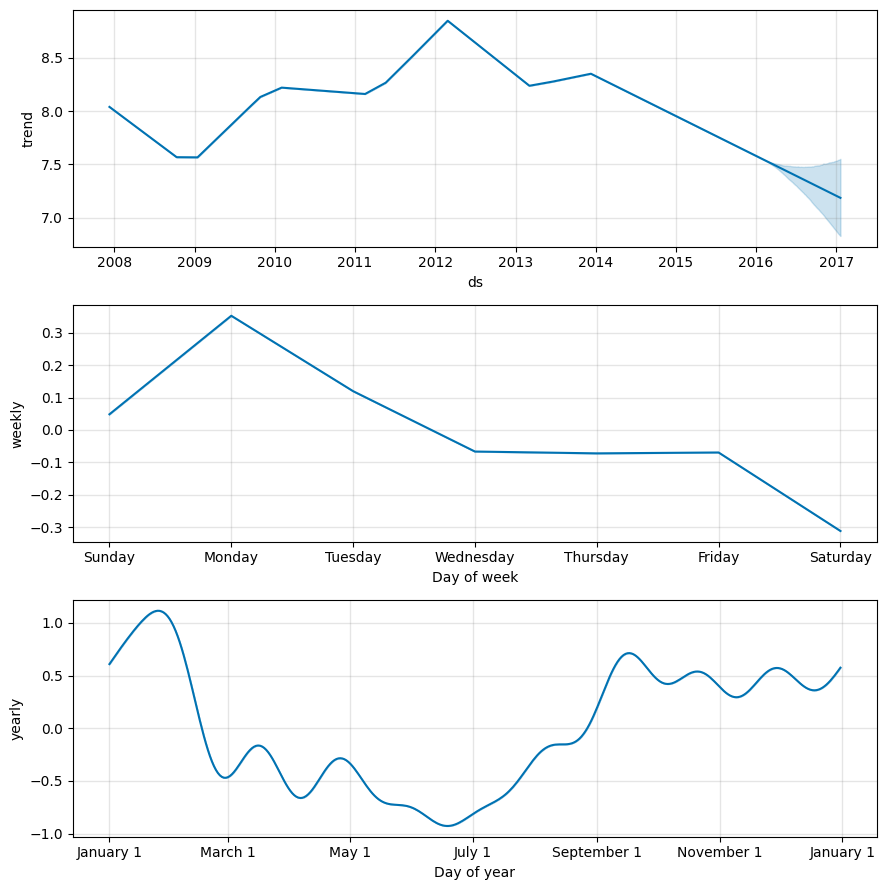

In [ ]:
# Python
fig2 = m.plot_components(forecast)


Trend refere-se a tendência , mas o a que se refere o weekly e yearly ?

Weekly (Semanal): A componente semanal modela padrões que se repetem a cada semana. Isso é útil para capturar flutuações regulares que ocorrem em dias da semana específicos. Por exemplo, em muitos casos, as vendas podem ser maiores nos fins de semana em comparação com os dias úteis.

Yearly (Anual): A componente anual captura padrões que se repetem a cada ano. Isso é útil para capturar flutuações sazonais que ocorrem no mesmo período de tempo a cada ano. Por exemplo, as vendas podem aumentar durante a temporada de férias no final do ano.

## **Saturação de Previsões (Saturating Forecast)**

Ele leva em consideração a saturação ou limitação inerente a certos fenômenos. Esse tipo de modelo é especialmente adequado para situações em que os valores da série temporal têm um potencial limitado de crescimento ou diminuição.

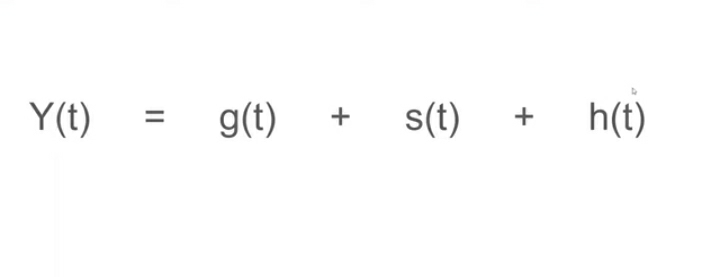

**Estrutura do algoritmo**

Previsão Y(t) é baseada em:
* g(t) tendência
* s(t) sazonalidade
* h(t) dias atípicos

1. Em tendências temos:
* **Growth:** Tipo de crescimento. Por padrão o *prophet* faz linear, porém pode-se optar por fazer de maneira não-linear usando uma logística
* **Changepoints:** São mudanças de tendência que o próprio modelo estima, mas podemos definir esses pontos ou dar parâmetros para o modelo selecionar mais ou menos pontos. A preocupação maior aqui deve ser de não gerar um SobreAjuste no modelo.

2. Em Sazonalidade o modelo usa Séries de Fourier.
Novamente, pode-se deixar o Prophet estimar automaticamente os parâmetros ou fornecer os valores desejados.

3. Para dias atípicos pode usar os feriados Americanos, padrão do sistema. Ou personalizar como preferir.

 O modelo também é capaz de estimar automaticamente sujestões.

**Carregando e entendendo os dados**

In [ ]:
# Este conjunto de dados é parte dos exemplos da biblioteca Prophet e contém dados de log-transformação de séries temporais que serão usados para demonstrar
# como o Prophet pode ser aplicado.

dfW = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')
dfW.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


In [ ]:
print(dfW.shape[0])

2863


In [ ]:
print(dfW.columns)

Index(['ds', 'y'], dtype='object')


**Aplicando Forecasting Growth (Previsão de crescimento)**

Parte do processo de preparação dos dados para modelagem de séries temporais com a biblioteca Prophet, a criação da coluna 'cap' é usada para especificar um limite superior (saturação) para as previsões de uma série temporal. Isso é especialmente útil quando se espera que os valores da série alcancem um limite superior à medida que a série progride.

In [ ]:
dfW['cap'] = 8.5 # adiciona a coluna 'cap' e a preenche com valores 8.5

Ao definir ['cap'] = 8.5, esta se definindo que o limite superior do modelo para as previsões é 8.5 em todas as observações do conjunto de dados. Porém, para um uso mais realista, o valor de 8.5 seria substituído por um valor relevante e específico para o problema em questão.

O importante a observar é que cap sempre é especificado para cada linha no dataframe e não precisa ser constante. Se o tamanho do mercado estiver crescendo, cap poderá ser uma sequência crescente.

In [ ]:
m = Prophet(growth='logistic') #criando uma instância do modelo, com parâmetro definido como 'logistic'. ou seja, modelo incorpora um crescimento logístico
m.fit(dfW) #  fit() é usado para estimar os parâmetros do modelo com base nos dados de treinamento

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/rwpx2i8s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/dz901or6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39055', 'data', 'file=/tmp/tmpxcvx8swo/rwpx2i8s.json', 'init=/tmp/tmpxcvx8swo/dz901or6.json', 'output', 'file=/tmp/tmpxcvx8swo/prophet_modelvs2da8yb/prophet_model-20230830085022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:50:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


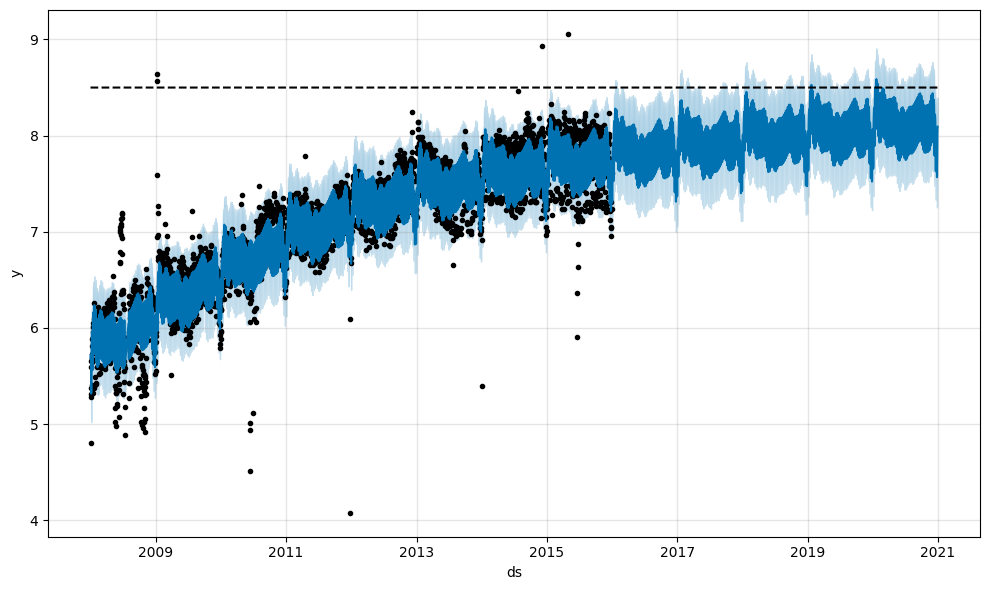

In [ ]:
future = m.make_future_dataframe(periods=1826) # O parâmetro 'periods' cria um DataFrame que inclui 1826 períodos
future['cap'] = 8.5 # define o limite superior (saturação) para as previsões
fcst = m.predict(future) #usando o modelo ajustado (m) para fazer previsões para as datas futuras contidas no DataFrame. resultado armazenado em fcst
fig = m.plot(fcst)

**Saturating Minimum(Mínimo de saturação)**

O modelo de crescimento logístico também pode lidar com um mínimo de saturação, que é especificado com uma coluna floorda mesma forma que a capcoluna especifica o máximo

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/xel7ucc7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/ik6kaaqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8023', 'data', 'file=/tmp/tmpxcvx8swo/xel7ucc7.json', 'init=/tmp/tmpxcvx8swo/ik6kaaqx.json', 'output', 'file=/tmp/tmpxcvx8swo/prophet_modellu810hba/prophet_model-20230830085049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:50:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


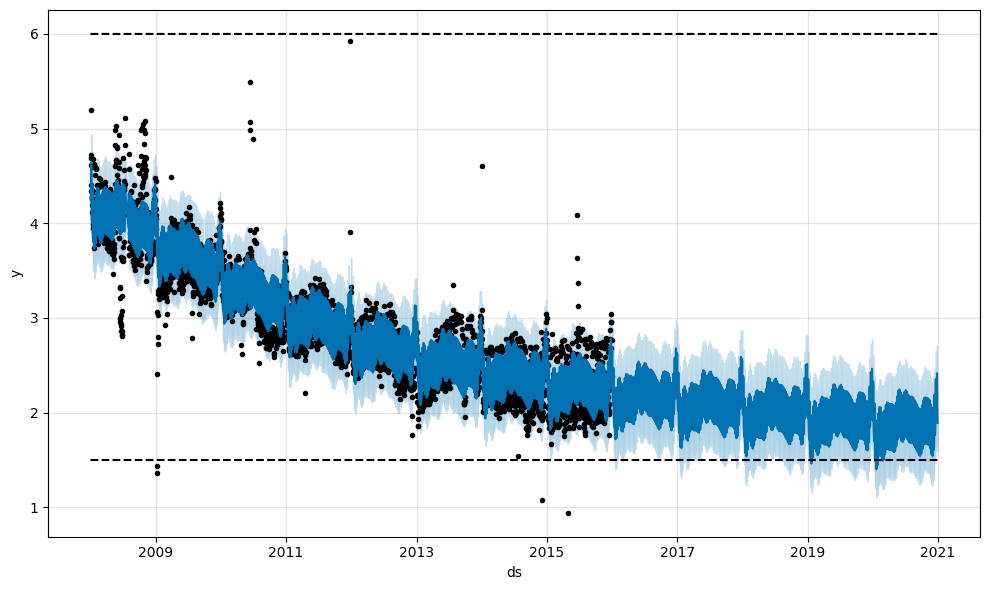

In [ ]:
dfW['y'] = 10 - dfW['y']
dfW['cap'] = 6
dfW['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(dfW)
fcst = m.predict(future)
fig = m.plot(fcst)

Atenção para o fato de que, para utilizar uma tendência de crescimento logístico com um mínimo de saturação, também deve ser especificada uma capacidade máxima.

## **Pontos de mudança de tendência (Trend ChangePoints)**

Séries temporais frequentemente apresentam mudanças abruptas em suas trajetórias. Por padrão, o Prophet detectará automaticamente esses pontos de mudança e permitirá que a tendência se adapte adequadamente. No entanto, caso se deseje ter um controle mais preciso sobre esse processo (por exemplo, o modelo perdeu uma alteração de taxa ou está ajustando demais as alterações de taxa no histórico), existem vários argumentos de entrada que podem ser usados.

**Detecção automática de changepoint no Prophet**

O Prophet detecta pontos de mudança especificando primeiro um grande número de pontos de mudança potenciais nos quais a taxa pode mudar. Em seguida, ele coloca uma priorização esparsa nas magnitudes das mudanças na taxa, isso essencialmente significa que o Prophet tem um grande número de locais possíveis onde a taxa pode mudar, mas usará o menor número possível deles.

Por padrão o Prophet especifica 25 pontos de mudança potenciais que são colocados uniformemente nos primeiros 80% pontos da série temporal. As linhas verticais na figura indicam onde os potenciais pontos de mudança foram colocados:

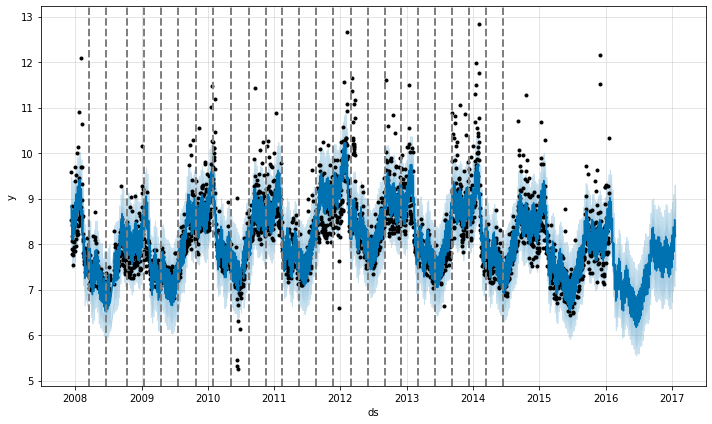

O número de pontos de mudança potenciais pode ser definido usando o argumento *n_changepoints*, mas isso é melhor ajustado ajustando a regularização. As localizações dos pontos de mudança de significação podem ser visualizadas com:

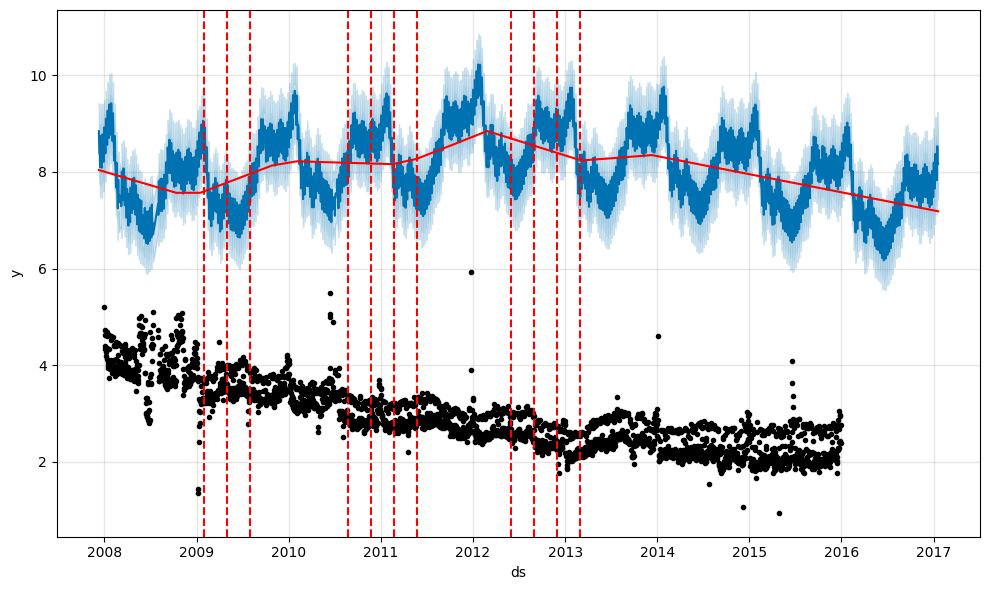

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


**Ajustando a flexibilidade das tendências**

Se as mudanças de tendência estiverem sendo superajustadas (muita flexibilidade) ou insuficientes (flexibilidade insuficiente), se podeajustar a força do esparso antes usando o argumento de entrada changepoint_prior_scale.

 Por padrão, esse parâmetro é definido como 0,05. Aumentá-lo tornará a tendência mais flexível:

In [ ]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
# fig = m.plot(forecast)

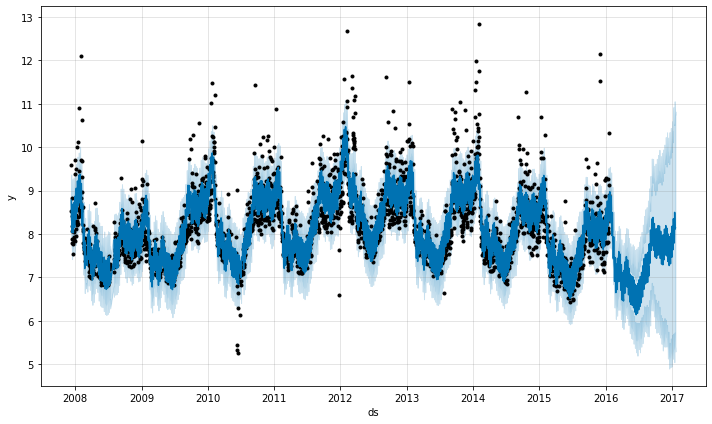

In [ ]:
# Diminuí-lo tornará a tendência menos flexível:

m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
# fig = m.plot(forecast)

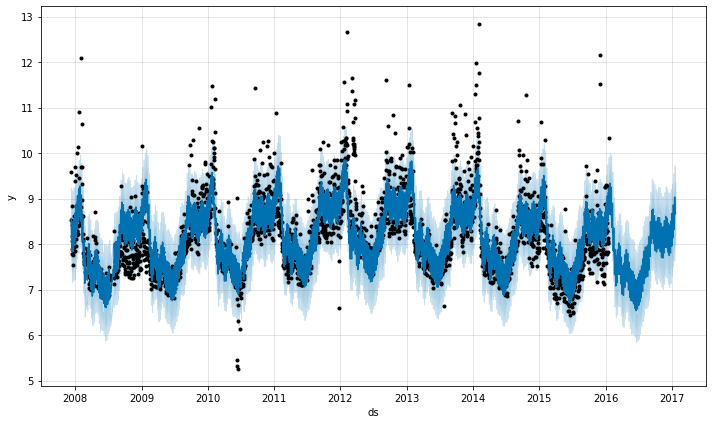

**Especificando os locais dos pontos de mudança**

Se desejar, em vez de usar a detecção automática de pontos de mudança, você pode especificar manualmente os locais de possíveis pontos de mudança com o changepointsargumento. As alterações de declive serão então permitidas apenas nestes pontos, com a mesma regularização esparsa de antes. Poderíamos, por exemplo, criar uma grade de pontos como é feito automaticamente, mas depois aumentar essa grade com algumas datas específicas que são conhecidas por serem susceptíveis de sofrer alterações. Como outro exemplo, os pontos de mudança poderiam ser inteiramente limitados a um pequeno conjunto de datas, como é feito aqui:

In [ ]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
# fig = m.plot(forecast)

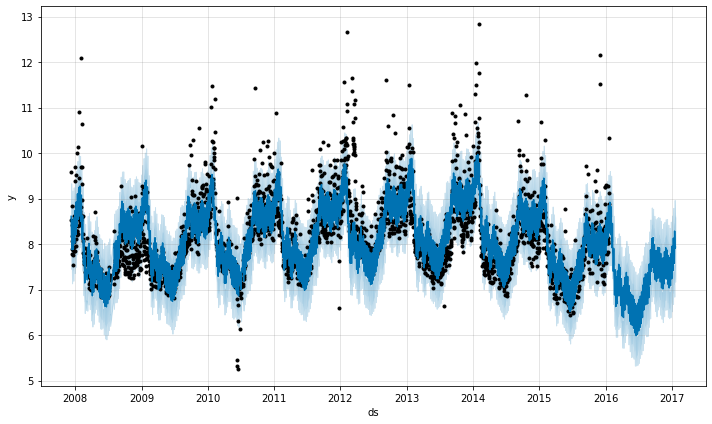

## **Handling Shocks**

* Problema :

Como resultado dos lockdowns causados pela pandemia de COVID-19, muitas séries temporais sofreram "choques" durante 2020, por exemplo, picos no consumo de mídia (Netflix, YouTube), transações de comércio eletrônico (Amazon, eBay), enquanto a participação em eventos presenciais diminuiu drasticamente. A maioria dessas séries temporais também manteria seu novo nível por um período de tempo, sujeito a flutuações impulsionadas pela flexibilização de lockdowns e/ou vacinas. Os padrões sazonais também podem ter mudado: por exemplo, as pessoas podem ter consumido menos mídia (no total de horas) nos dias de semana em comparação com os fins de semana antes dos lockdowns COVID, mas durante os lockdowns o consumo durante a semana pode ser muito mais próximo do consumo de fim de semana.

* Como analisar esses dados de forma correta  :

Nesta seção, exploraremos algumas estratégias para capturar esses efeitos usando a funcionalidade do Prophet:


1 - Marcando mudanças de passo / picos devido a eventos COVID como uma única vez.

2-  Mudanças sustentadas de comportamento que levam a mudanças de tendência e sazonalidade.

* Caso estudado :  Atividade de Pedestre em Melbourne

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_pedestrians_covid.csv')


In [ ]:
df.head()

,ds,y
0,2017-06-02,39230
1,2017-06-03,35290
2,2017-06-04,27083
3,2017-06-05,28727
4,2017-06-06,30315


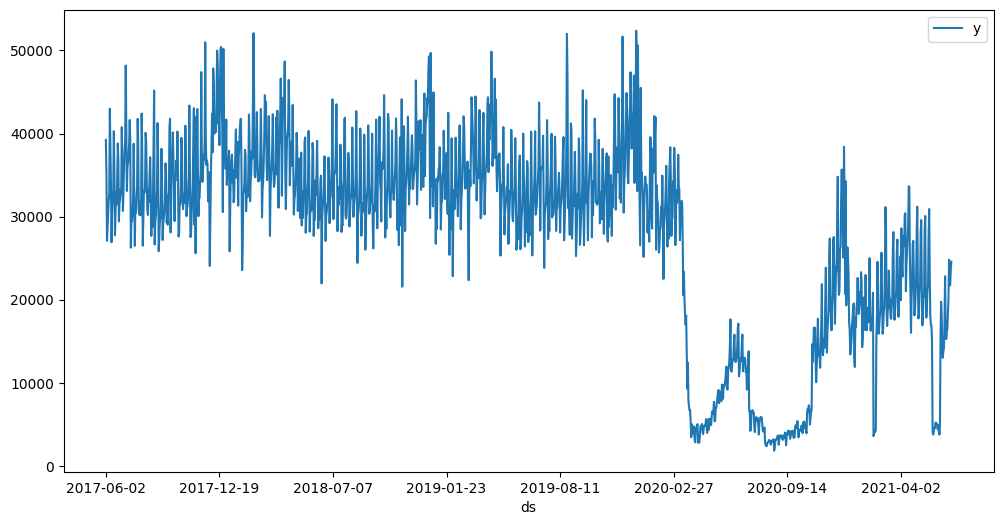

In [ ]:
df.set_index('ds').plot(figsize=(12,6));


* Modelo padrão sem nenhum ajuste

In [ ]:
m = Prophet()
m = m.fit(df)
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/_kosev78.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/4qf2k1s1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76136', 'data', 'file=/tmp/tmpxcvx8swo/_kosev78.json', 'init=/tmp/tmpxcvx8swo/4qf2k1s1.json', 'output', 'file=/tmp/tmpxcvx8swo/prophet_modelb7c8pwkl/prophet_model-20230830085103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


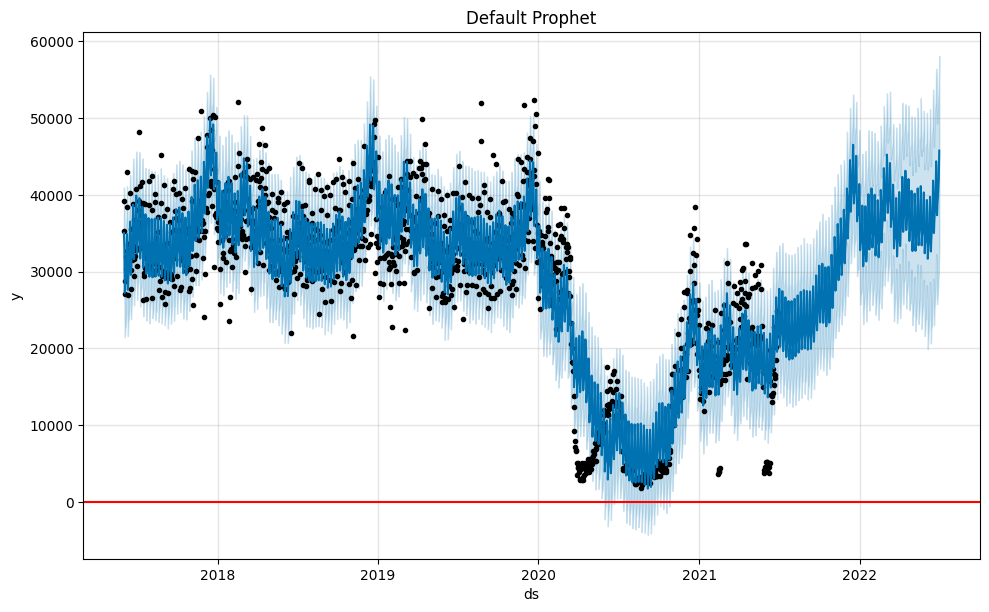

In [ ]:
m.plot(forecast)
plt.axhline(y=0, color='red')
plt.title('Default Prophet');


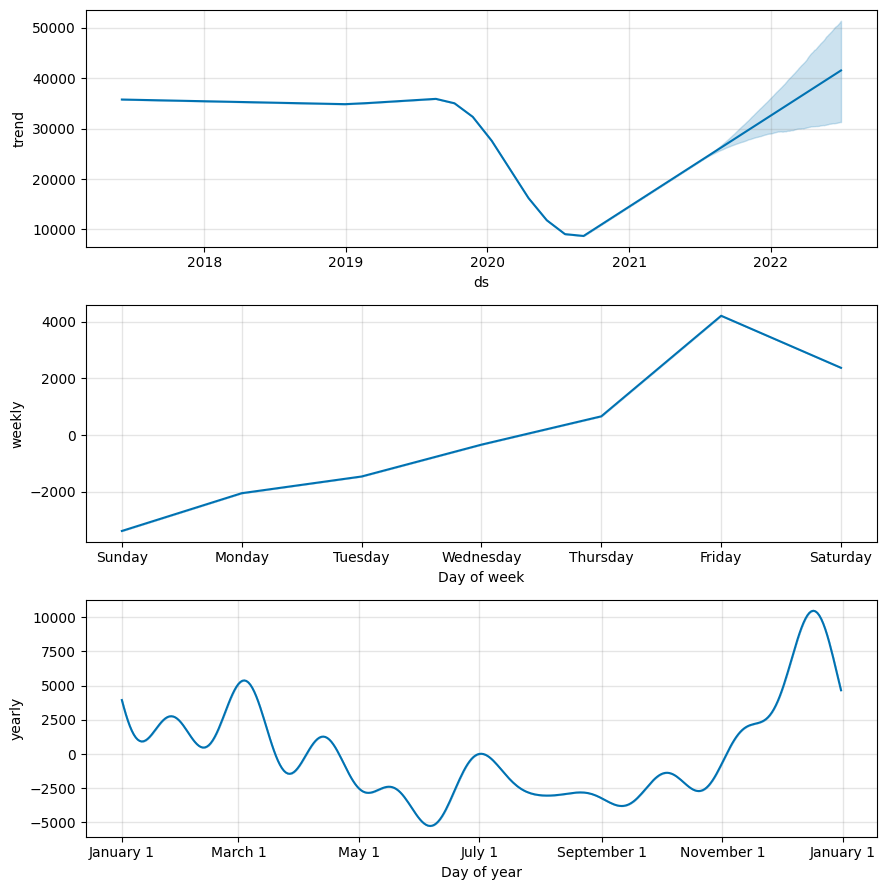

In [ ]:
m.plot_components(forecast);


O modelo parece se ajustar razoavelmente aos dados passados, mas observe como estamos capturando as quedas e os picos após as quedas como parte do componente de tendência. Por padrão, o modelo assume que esses grandes picos são possíveis no futuro, mesmo que realisticamente não vejamos algo da mesma magnitude dentro de nosso horizonte de previsão (1 ano neste caso). Isso leva a uma previsão bastante otimista da recuperação do tráfego de pedestres em 2022.

* Modelo que usamos os lockdowns como "holidays"

Antes precisamos aboradar o conceito de holidays .

No Prophet, a definição de feriados é uma funcionalidade importante que permite incorporar os efeitos de datas especiais, como feriados, no modelo de previsão de séries temporais. O termo "holidays" se refere a essas datas específicas que podem afetar os padrões da série temporal.

A funcionalidade de feriados no Prophet permite que você modele os efeitos de feriados conhecidos, que podem ter um impacto significativo nas séries temporais, como flutuações nas vendas, no tráfego da web, no comportamento do usuário e assim por diante.

In [ ]:
# Python
lockdowns = pd.DataFrame([
    {'holiday': 'lockdown_1', 'ds': '2020-03-21', 'lower_window': 0, 'ds_upper': '2020-06-06'},
    {'holiday': 'lockdown_2', 'ds': '2020-07-09', 'lower_window': 0, 'ds_upper': '2020-10-27'},
    {'holiday': 'lockdown_3', 'ds': '2021-02-13', 'lower_window': 0, 'ds_upper': '2021-02-17'},
    {'holiday': 'lockdown_4', 'ds': '2021-05-28', 'lower_window': 0, 'ds_upper': '2021-06-10'},
])
for t_col in ['ds', 'ds_upper']:
    lockdowns[t_col] = pd.to_datetime(lockdowns[t_col])
lockdowns['upper_window'] = (lockdowns['ds_upper'] - lockdowns['ds']).dt.days
lockdowns

,holiday,ds,lower_window,ds_upper,upper_window
0,lockdown_1,2020-03-21,0,2020-06-06,77
1,lockdown_2,2020-07-09,0,2020-10-27,110
2,lockdown_3,2021-02-13,0,2021-02-17,4
3,lockdown_4,2021-05-28,0,2021-06-10,13


In [ ]:
# Python
m2 = Prophet(holidays=lockdowns)
m2 = m2.fit(df)
future2 = m2.make_future_dataframe(periods=366)
forecast2 = m2.predict(future2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/0o9f44x4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/jygewc95.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17964', 'data', 'file=/tmp/tmpxcvx8swo/0o9f44x4.json', 'init=/tmp/tmpxcvx8swo/jygewc95.json', 'output', 'file=/tmp/tmpxcvx8swo/prophet_model53l_o5xe/prophet_model-20230830085106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


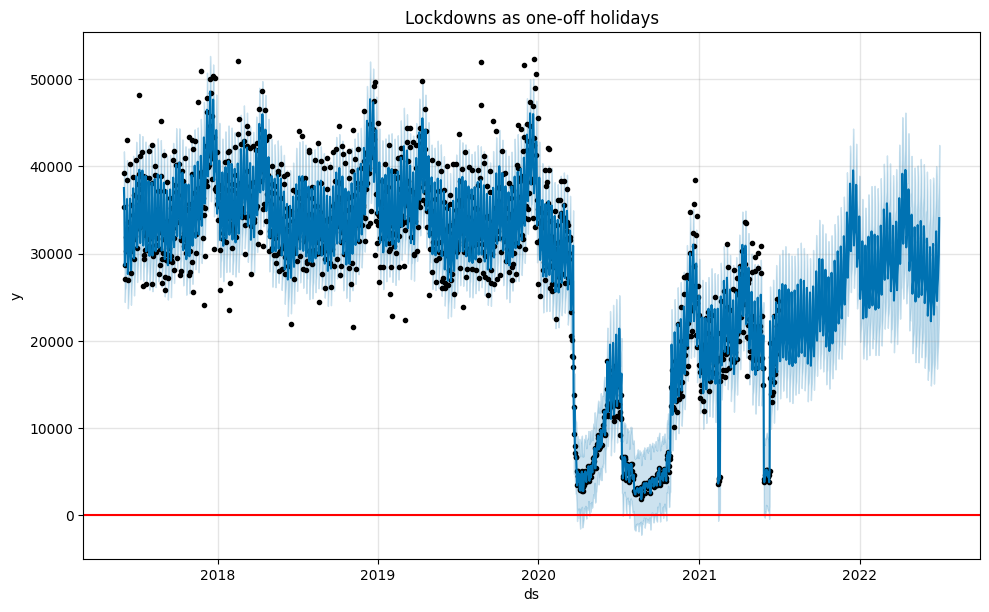

In [ ]:
# Python
m2.plot(forecast2)
plt.axhline(y=0, color='red')
plt.title('Lockdowns as one-off holidays');

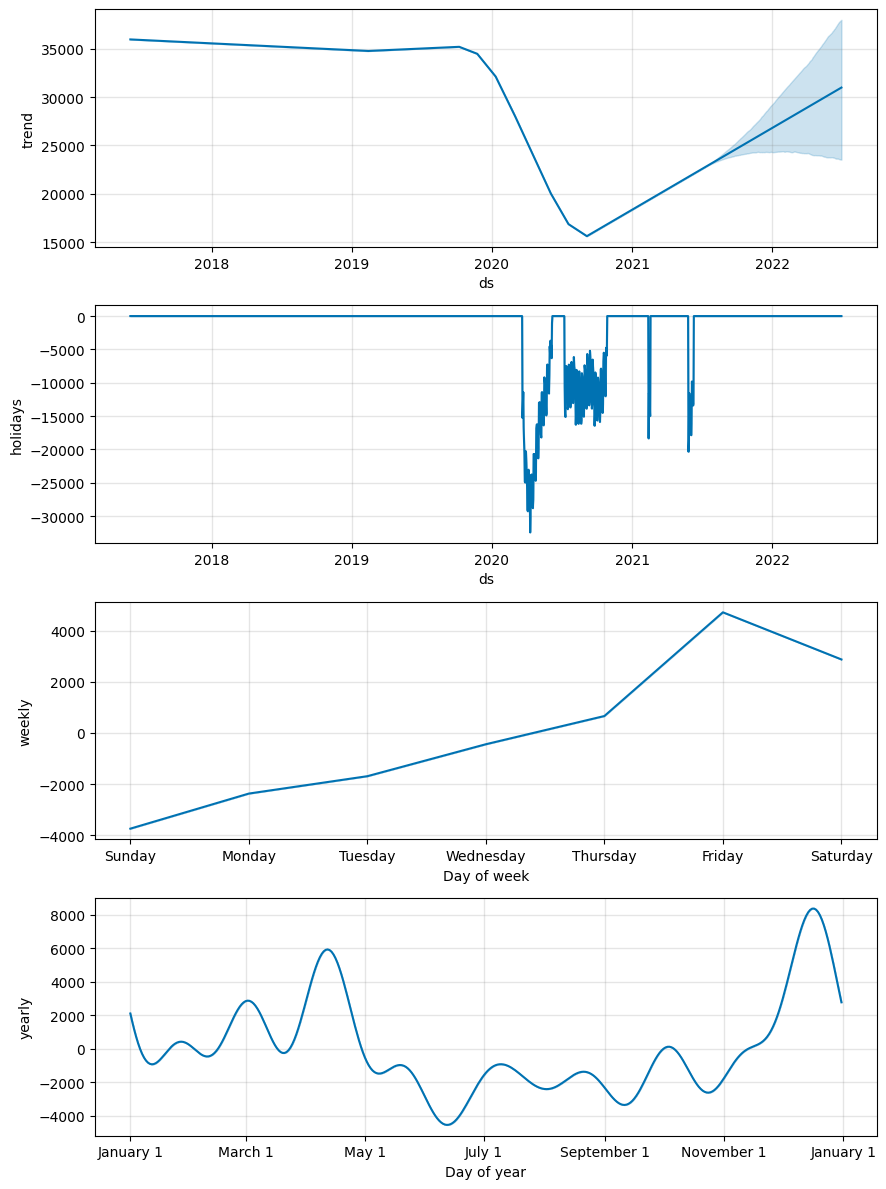

In [ ]:
m2.plot_components(forecast2);


* Mudanças na sazonalidade antes  e pós COVID

Os gráficos de componentes sazonais nas seções anteriores mostram um pico de atividade na sexta-feira em comparação com outros dias da semana. Se não tivermos certeza se isso ainda se manterá pós-lockdown, podemos adicionar sazonalidades condicionais ao modelo. As sazonalidades condicionais são explicadas com mais detalhes aqui.

In [ ]:
# Python
df2 = df.copy()
df2['pre_covid'] = pd.to_datetime(df2['ds']) < pd.to_datetime('2020-03-21')
df2['post_covid'] = ~df2['pre_covid']

In [ ]:
m4 = Prophet(holidays=lockdowns, weekly_seasonality=False)


In [ ]:
# Python
m4.add_seasonality(
    name='weekly_pre_covid',
    period=7,
    fourier_order=3,
    condition_name='pre_covid',
)
m4.add_seasonality(
    name='weekly_post_covid',
    period=7,
    fourier_order=3,
    condition_name='post_covid',
);

In [ ]:
m4 = m4.fit(df2)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/qi5hom4n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxcvx8swo/jlclurag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66199', 'data', 'file=/tmp/tmpxcvx8swo/qi5hom4n.json', 'init=/tmp/tmpxcvx8swo/jlclurag.json', 'output', 'file=/tmp/tmpxcvx8swo/prophet_modelo68bhiqt/prophet_model-20230830085110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:51:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:51:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future4 = m4.make_future_dataframe(periods=366)
future4['pre_covid'] = pd.to_datetime(future4['ds']) < pd.to_datetime('2020-03-21')
future4['post_covid'] = ~future4['pre_covid']

forecast4 = m4.predict(future4)


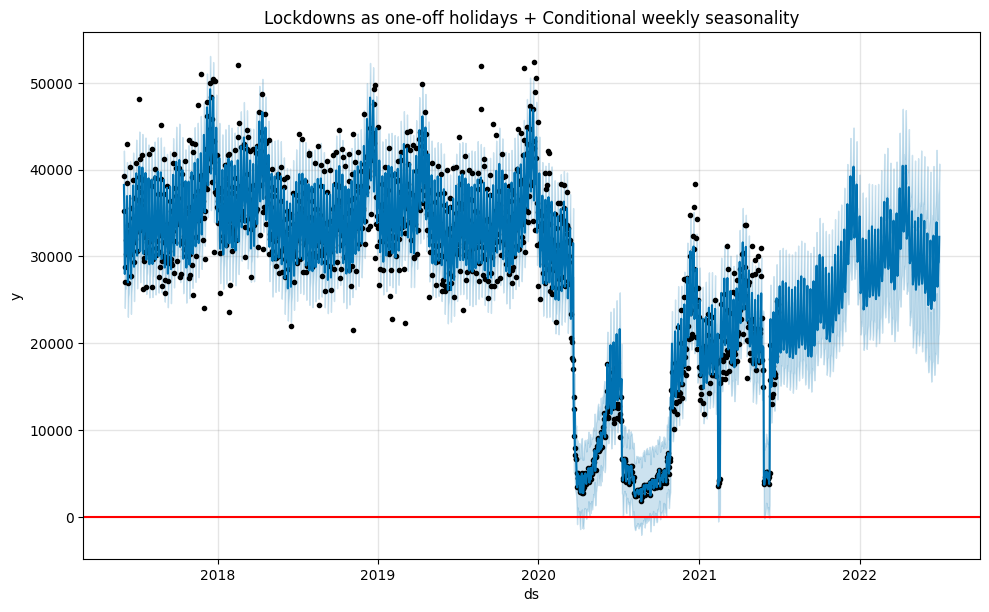

In [ ]:
m4.plot(forecast4)
plt.axhline(y=0, color='red')
plt.title('Lockdowns as one-off holidays + Conditional weekly seasonality');


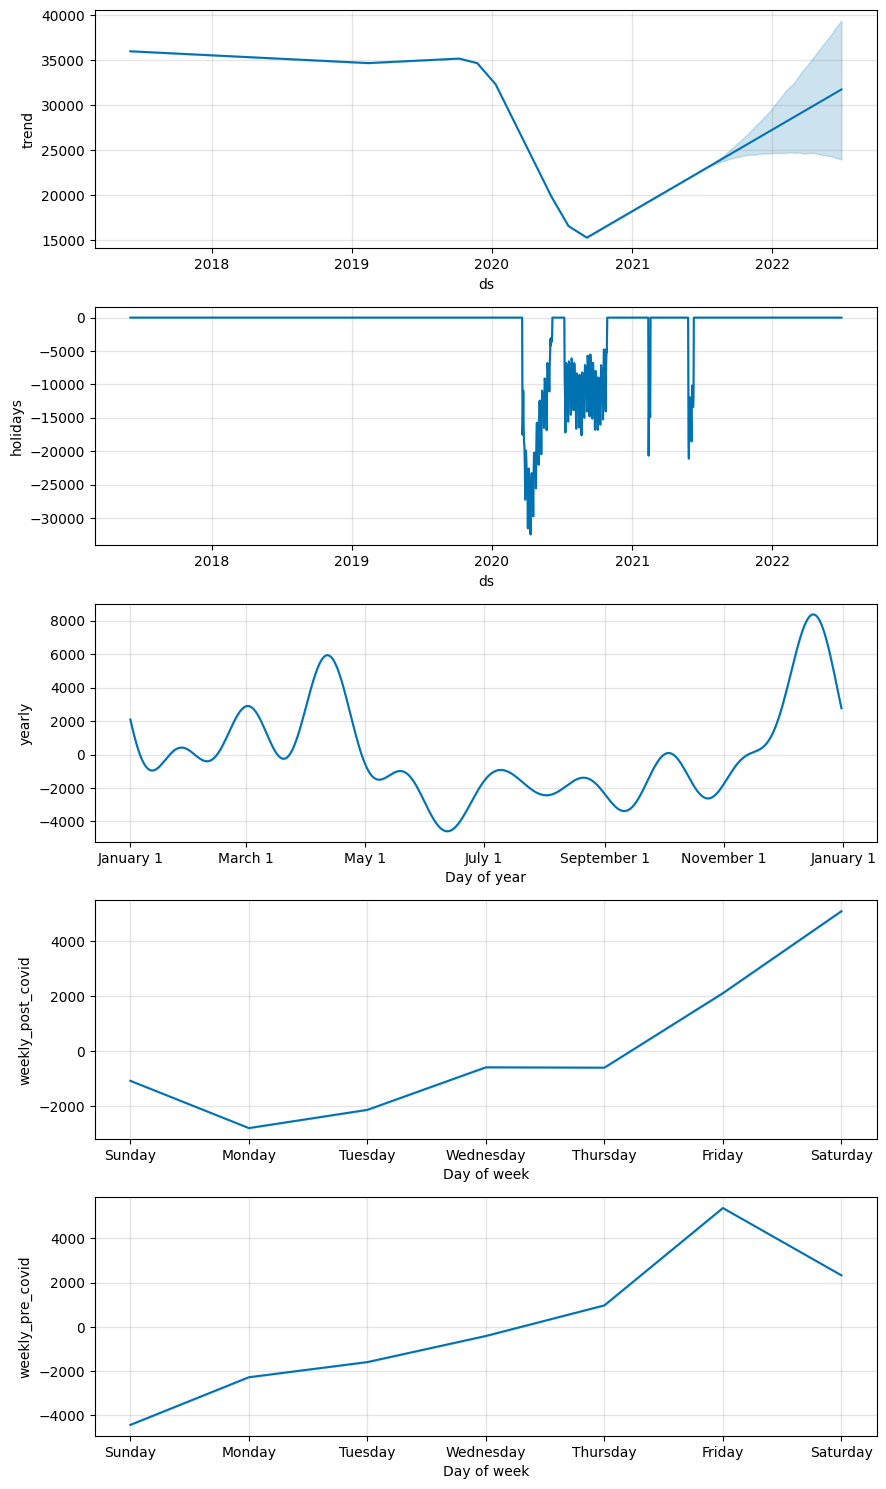

In [ ]:
m4.plot_components(forecast4);


* Conclusões

Curiosamente, o modelo com sazonalidades condicionais sugere que, pós-COVID, a atividade de pedestres atinge o pico aos sábados, em vez de sextas-feiras. Isso pode fazer sentido se a maioria das pessoas ainda estiver trabalhando em casa e, portanto, tiver menos probabilidade de sair nas noites de sexta-feira. De uma perspectiva de previsão, isso só seria importante se nos preocuparmos em prever dias de semana versus fins de semana com precisão, mas no geral esse tipo de exploração nos ajuda a obter informações sobre como o COVID mudou os comportamentos.

## Referências

https://facebook.github.io/prophet/docs/quick_start.html

https://www.youtube.com/watch?v=jygb-BqPxRk&ab_channel=SamuelMac%C3%AAdo